<a href="https://colab.research.google.com/github/moung1012/Numpy-Pandas/blob/master/keras5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기
- 4000개의 강아지와 고양이 사진을 사용(5:5)
- 훈련 2000개 검증 1000개 테스트 1000개 사용
- 이 방법의 주요 이슈는 과대적합
- 과대적합을 줄이기 위한 강력한 방법인 데이터 증식 소개
- 데이터 증식을 통해 네트워크의 성능을 82%의 정확도로 향상


###작은 데이터셋 문제에서 딥러닝의 타당성
- 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것 이는 훈련 샘플이 많아야 가능하다 특히 이미지와 같이 매우 고차원인 문제에서는 특히 더
- 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분할 수 있다
- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용한다
- 딥러닝 모델은 태생적으로 매우 다목적이다
  - 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용할 수 있다
  - 컴퓨터 비전에서는 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있다
  

In [1]:
import os, shutil

In [2]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir ='C:\\Users\\com\\Desktop\\케라스 자료\\train_dog_vs_cat\\train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:\\Users\\com\\Desktop\\케라스 자료\\small_dataset'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

복사가 잘 되었는지 확인하기 위해 각 분할(훈련/검증/테스트)에 들어있는 사진의 개수 카운트

In [3]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [4]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [5]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [6]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [7]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [8]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


2000개의 훈련 이미지, 1000개의 검증 이미지, 1000개의 테스트 이미지 준비완료  
분할된 각 데이터는 클래스마다 동일한 개수의 샘플을 포함한다

---
### 네트워크 구성하기
- Conv2D(relu 활성화 함수 사용)와 MaxPooling2D층을 번갈아 쌓은 컨브넷 생성
- 이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층과) sigmoid 활성화 함수로 끝난다

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

컴파일 단계에서 RMSprop 옵티마이저를 선택 네트워크의 마지막이 하나의 시그모이드 유닛이기 때문에 이진 크로스앤트로피를 손실로 사용

In [37]:
import keras
keras.__version__

'2.6.0'

In [41]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 데이터 전처리
데이터는 네트워크에 주입되거 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 한다 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 다음 과정을 따른다
- 사진 파일 읽기
- JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
- 부동 소수 타입의 텐서로 변환
- 픽셀 값(0에서 255사이)의 스케일을 [0,1]사이로 조정(신경망은 작은 입력 값을 선호)  
케라스에서는 이미지 처리를 위한 헬퍼 도구들을 가지고 있다(keras.preprocessing.image)  특히 ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 준다

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


이 제너레이터의 출력 하나를 살펴보자  
- 출력 150 X 150 RGB이미지의 배치 (20, 150, 150, 3) 크기와 이진 레이블의 배치 (20,)크기
- 각 배치에는 20개의 샘플(배치 크기)이 있다
- 제너레이터는 이 배치를 무한정 만들어 내고 타깃 폴더에 있는 이미지를 끝없이 반복한다 따라서 반복 루프안의 어디선가 break문을 사용해야 한다

In [44]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


제너레이터를 사용한 모델을 훈련시켜 보자
- fit_generator 메서드는 fit 메서드와 동일하되 데이터 제너레이터 사용 가능
- 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다(steps_per_epoch 매개변수에서 이를 설정)
- 제너레이터로부터 step_per_epoch개의 배치만큼 뽑은 다음, 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다
- 20개의 샘플이 하나의 배치이므로 2000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다
    
- fit_generator를 사용할 때 fit 메서드와 마찬가지로 validation_data 매개변수를 전달할 수 있다 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다 
- valdation_data로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 validation_steps 매개변수에 지정해야 한다


In [45]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\com\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 24s 235ms/step - loss: 0.6935 - acc: 0.5255 - val_loss: 0.6721 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6577 - acc: 0.6120 - val_loss: 0.6568 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 22s 220ms/step - loss: 0.6109 - acc: 0.6710 - val_loss: 0.6152 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 22s 221ms/step - loss: 0.5628 - acc: 0.7065 - val_loss: 0.5991 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 22s 219ms/step - loss: 0.5372 - acc: 0.7280 - val_loss: 0.6061 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 22s 220ms/step - loss: 0.5089 - acc: 0.7355 - val_loss: 0.6027 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 22s 218ms/step - loss: 0.4888 - acc: 0.7530 - val_loss: 0.6448 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 2

In [47]:
model.save('cats_and_dogs_small_1.h5')#훈련이 끝나면 항상 모델을 저장하는 것이 좋은 습관이다

---
훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보자

In [49]:
import matplotlib.pyplot as plt

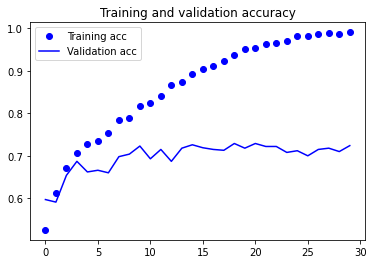

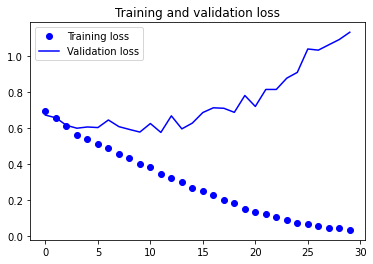

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 그래프는 과대적합의 특성을 보여준다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달  
반면 검증 정확도는 70~72%에 멈추었다 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전이 되지 않는다. 반면 훈련 손실은 거의 0에 도달할 떄까지 선형적으로 계속 감소한다  
비교적 훈련 샘플의 수가 적기 때문에 과대적합이 가장 중요한 문제이다. 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러가지 기법들을 배웠다면 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해보자

---
### 데이터 증식 사용하기
- 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생
- 무한이 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이다
- 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법
- 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘린다. 훈련 시 모딜이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표
- 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것이다
- 케라스에서는 ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있다


In [51]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

추가적인 매개변수가 몇개 더 있다  
- rotation_range는 랜덤하게 사진을 회전시킬 각도 범위 (0~180 사이)
- width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위(전체 넓이와 높이에 대한 비율)
- shear_range는 랜덤하게 전단 변환을 적용할 각도 범위
- zoom_range는 랜덤하게 사진을 확대할 범위
- horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집고 수평 대칭을 가정할 수 있을때 사용( 풍경/인물사진)
- flill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


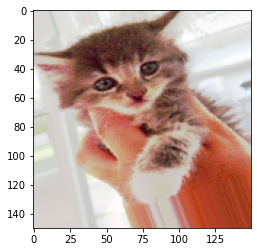

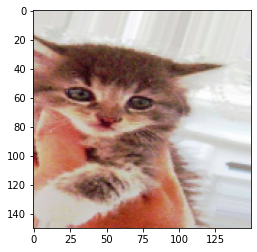

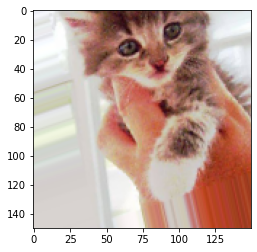

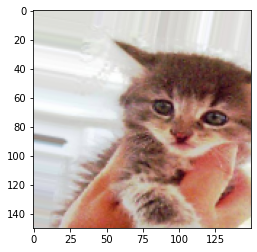

In [52]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않는다  
하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상효 연관성이 크다  
즉 새로운 정보를 만들어 낼 수 없고 단지 기존 정보의 재조합만 가능하다 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있다 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout층을 추가해보자


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=30)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 11s 350ms/step - loss: 0.5547 - acc: 0.7066
Epoch 2/30
30/30 [==============================] - 10s 340ms/step - loss: 0.5445 - acc: 0.7288
Epoch 3/30
30/30 [==============================] - 10s 345ms/step - loss: 0.5545 - acc: 0.7229
Epoch 4/30
30/30 [==============================] - 10s 339ms/step - loss: 0.5440 - acc: 0.7278
Epoch 5/30
30/30 [==============================] - 10s 345ms/step - loss: 0.5521 - acc: 0.7193
Epoch 6/30
30/30 [==============================] - 11s 352ms/step - loss: 0.5795 - acc: 0.6979
Epoch 7/30
30/30 [==============================] - 11s 348ms/step - loss: 0.5469 - acc: 0.7271
Epoch 8/30
30/30 [==============================] - 11s 351ms/step - loss: 0.5362 - acc: 0.7448
Epoch 9/30
30/30 [==============================] - 11s 349ms/step - loss: 0.5315 - acc: 0.7352
Epoch 10/30
30/30 [==============================] -

In [ ]:
#다음 절에서 이 모델을 사용하기 위해 모델을 저장
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()